# Рубежный контроль №1
Зубков Андрей, ИУ5-64, Вариант №6, Задание №1, Набор данных №6

# Задание
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель

# Дополнительное задание
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

# Решение

Подключим необходимые библиотеки и загрузим набор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Устанавливаем тип графиков
sns.set(style="ticks")

# Для лучшего качествоа графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Устанавливаем ширину экрана для отчета
pd.set_option("display.width", 70)

# Загружаем данные
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [3]:
data.shape

(400, 9)

In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Как видим, в наборе данных отсутствуют пропуски

#### Проведем корреляционный анализ

In [5]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Построим тепловую карту

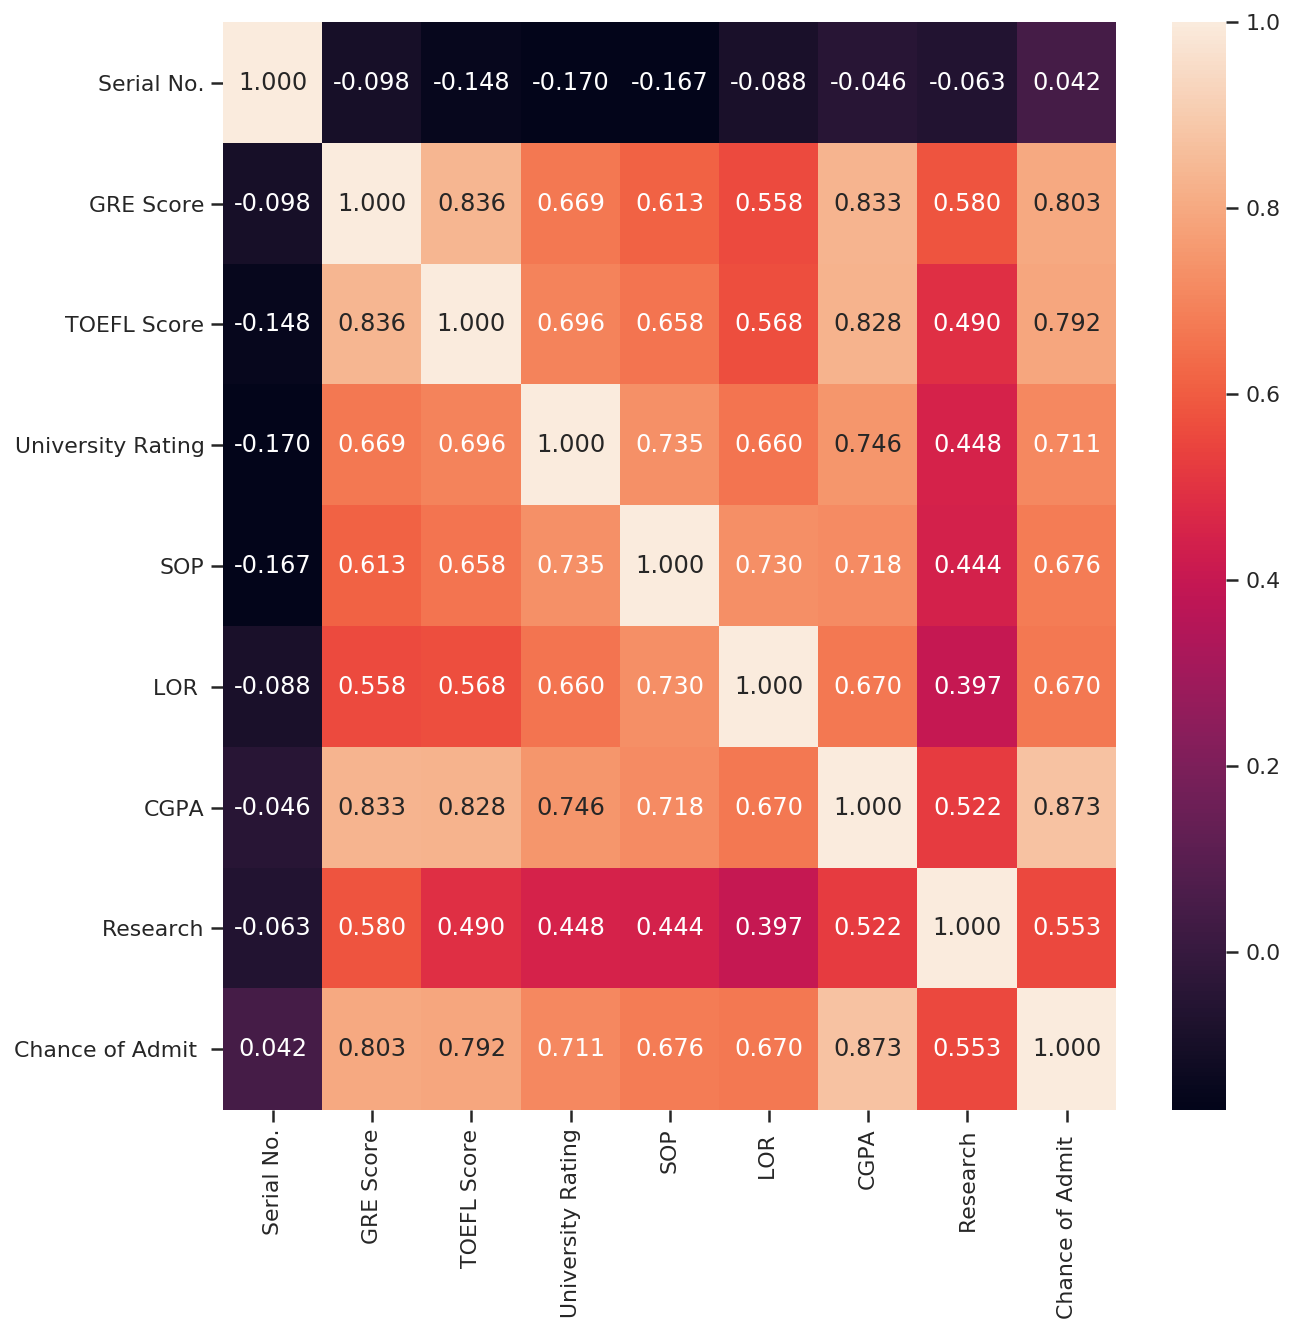

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Признак Serial No. можно исключить из модели, так как он слабо коррелирует с целевым признаком;
* Целевой признак наиболее сильно коррелирует с признаком CGPA. Его обязательно нужно оставить;
* Признак CGPA сильно зависим с признаками GRE Score, TOEFL Score. Их можно будет попробовать исключить из модели;
* Также можно попробовать исключить признак Research, так как он слабо коррелирует с целевым признаком, но он слабо зависим от других признаков, поэтому его можно оставить.

#### Построим violin plot для колонки CGPA

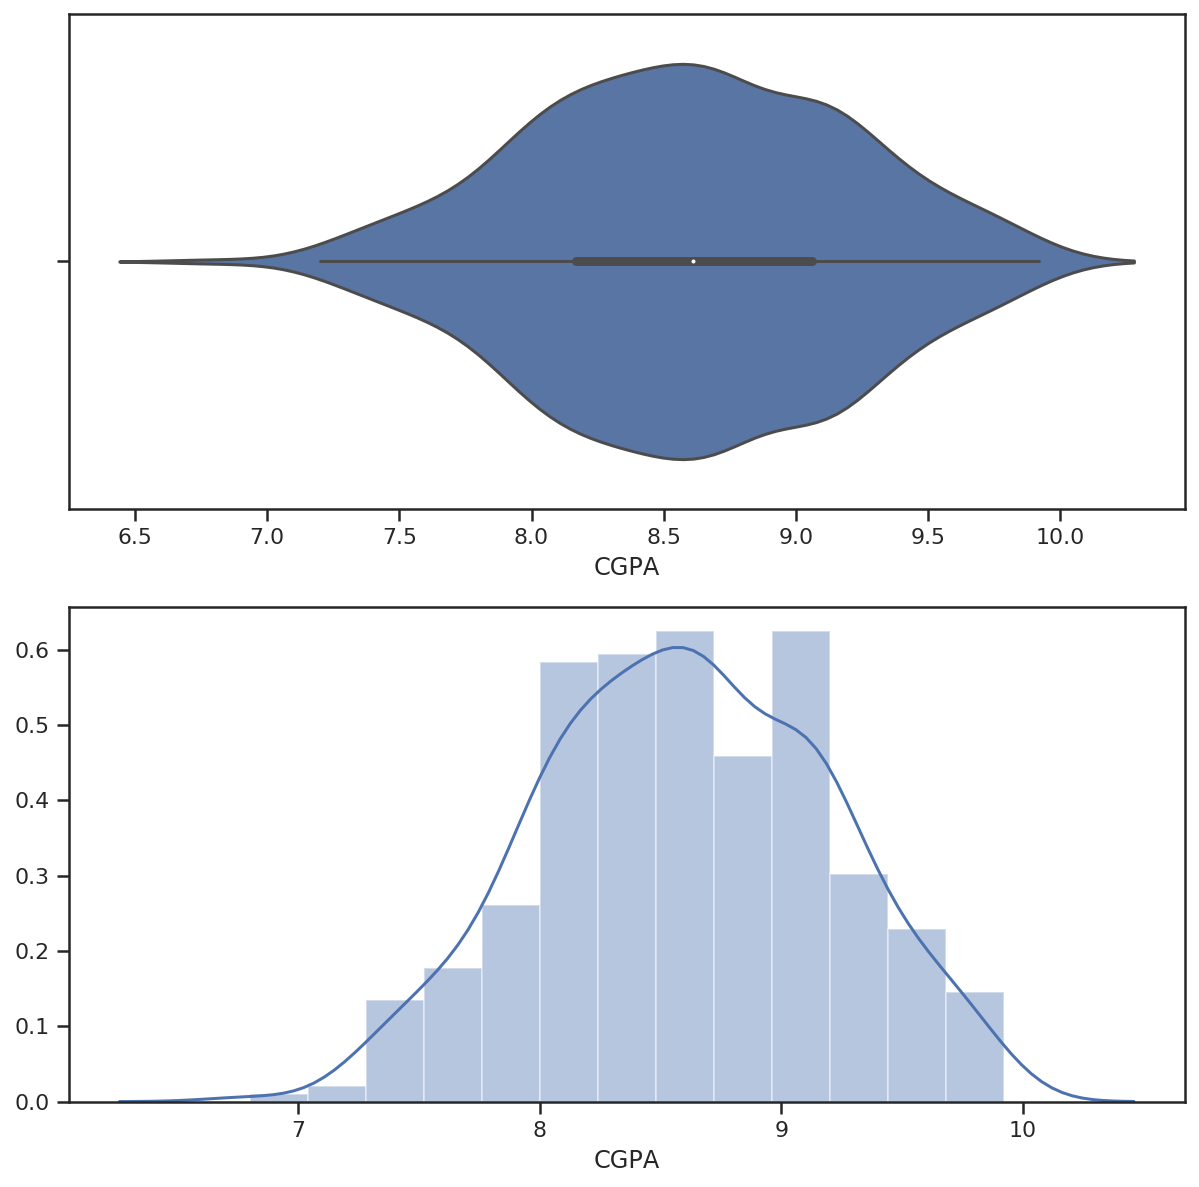

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['CGPA'])
sns.distplot(data['CGPA'], ax=ax[1])